In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="ticks", color_codes=True)

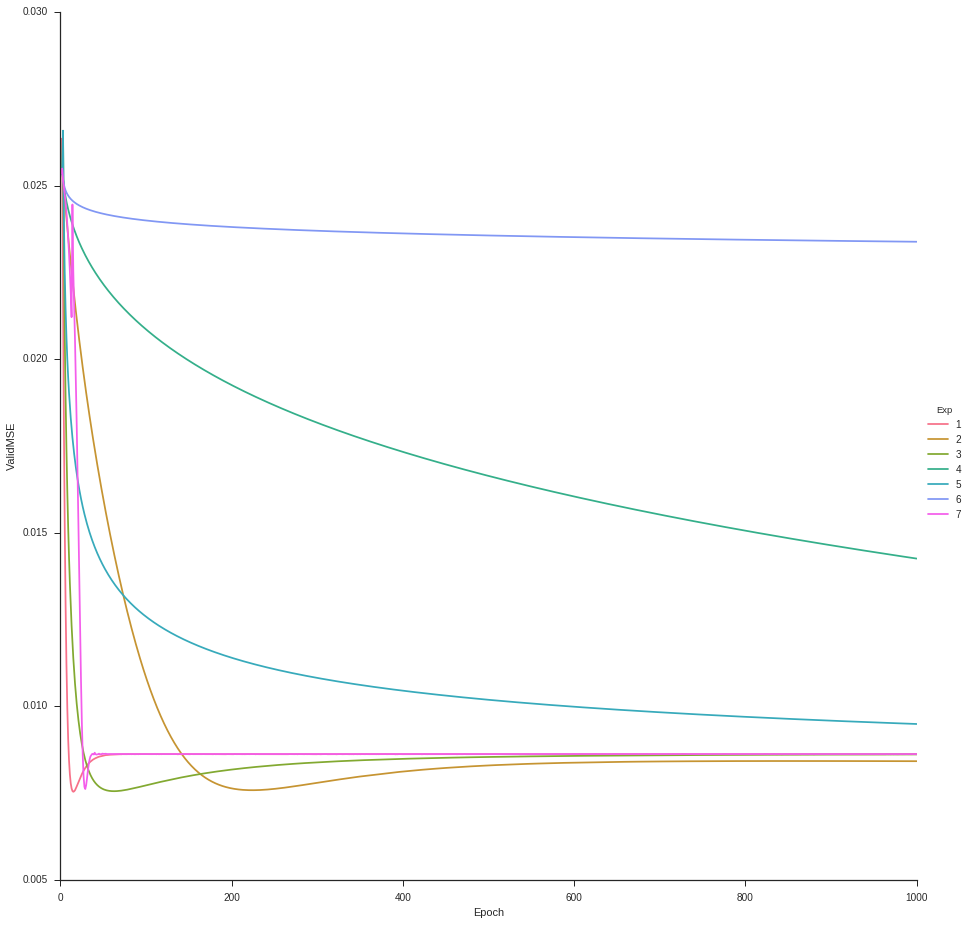

In [19]:
#Exp 1 learning rate
filepath = 'exp1/exp1.csv'
exp1 = pd.read_csv(filepath)
g = sns.FacetGrid(exp1, hue="Exp", size=13)
#g = sns.FacetGrid(exp1, col="Exp", col_wrap = 2, size=13)
g.map(plt.plot, "Epoch", "ValidMSE")
g.add_legend();

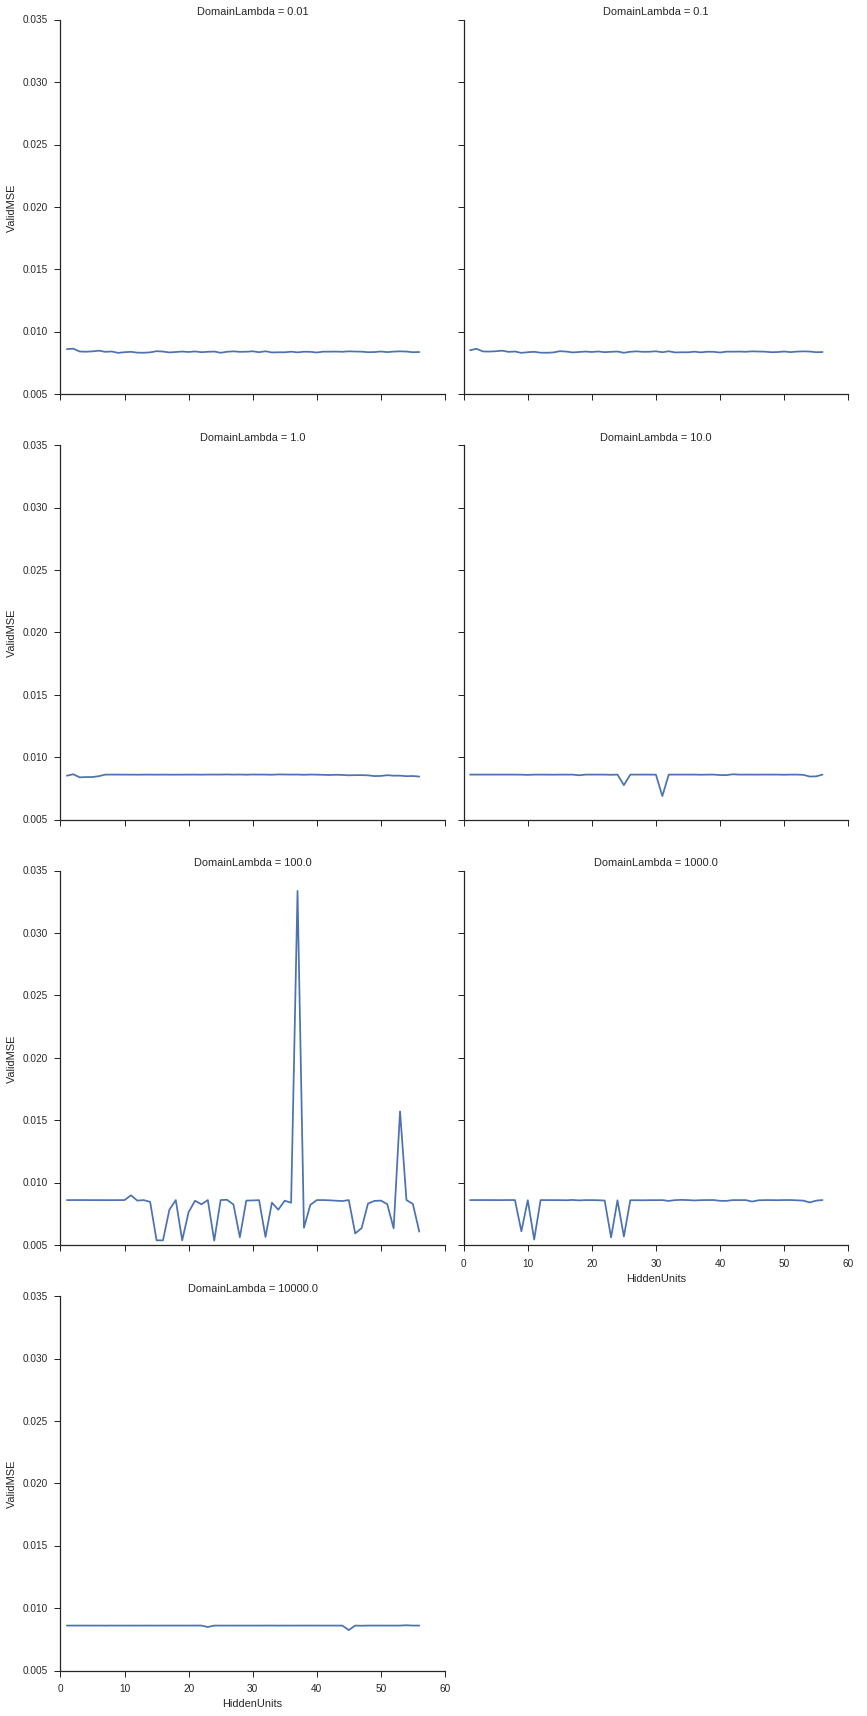

In [15]:
#exp2 0-56
filepath = 'exp2/exp2.csv'
exp2 = pd.read_csv(filepath)
#g = sns.FacetGrid(exp2,hue="DomainLambda", size=13)
g = sns.FacetGrid(exp2,col_wrap=2, col="DomainLambda", size=6)
g.map(plt.plot, "HiddenUnits", "ValidMSE")
g.add_legend();

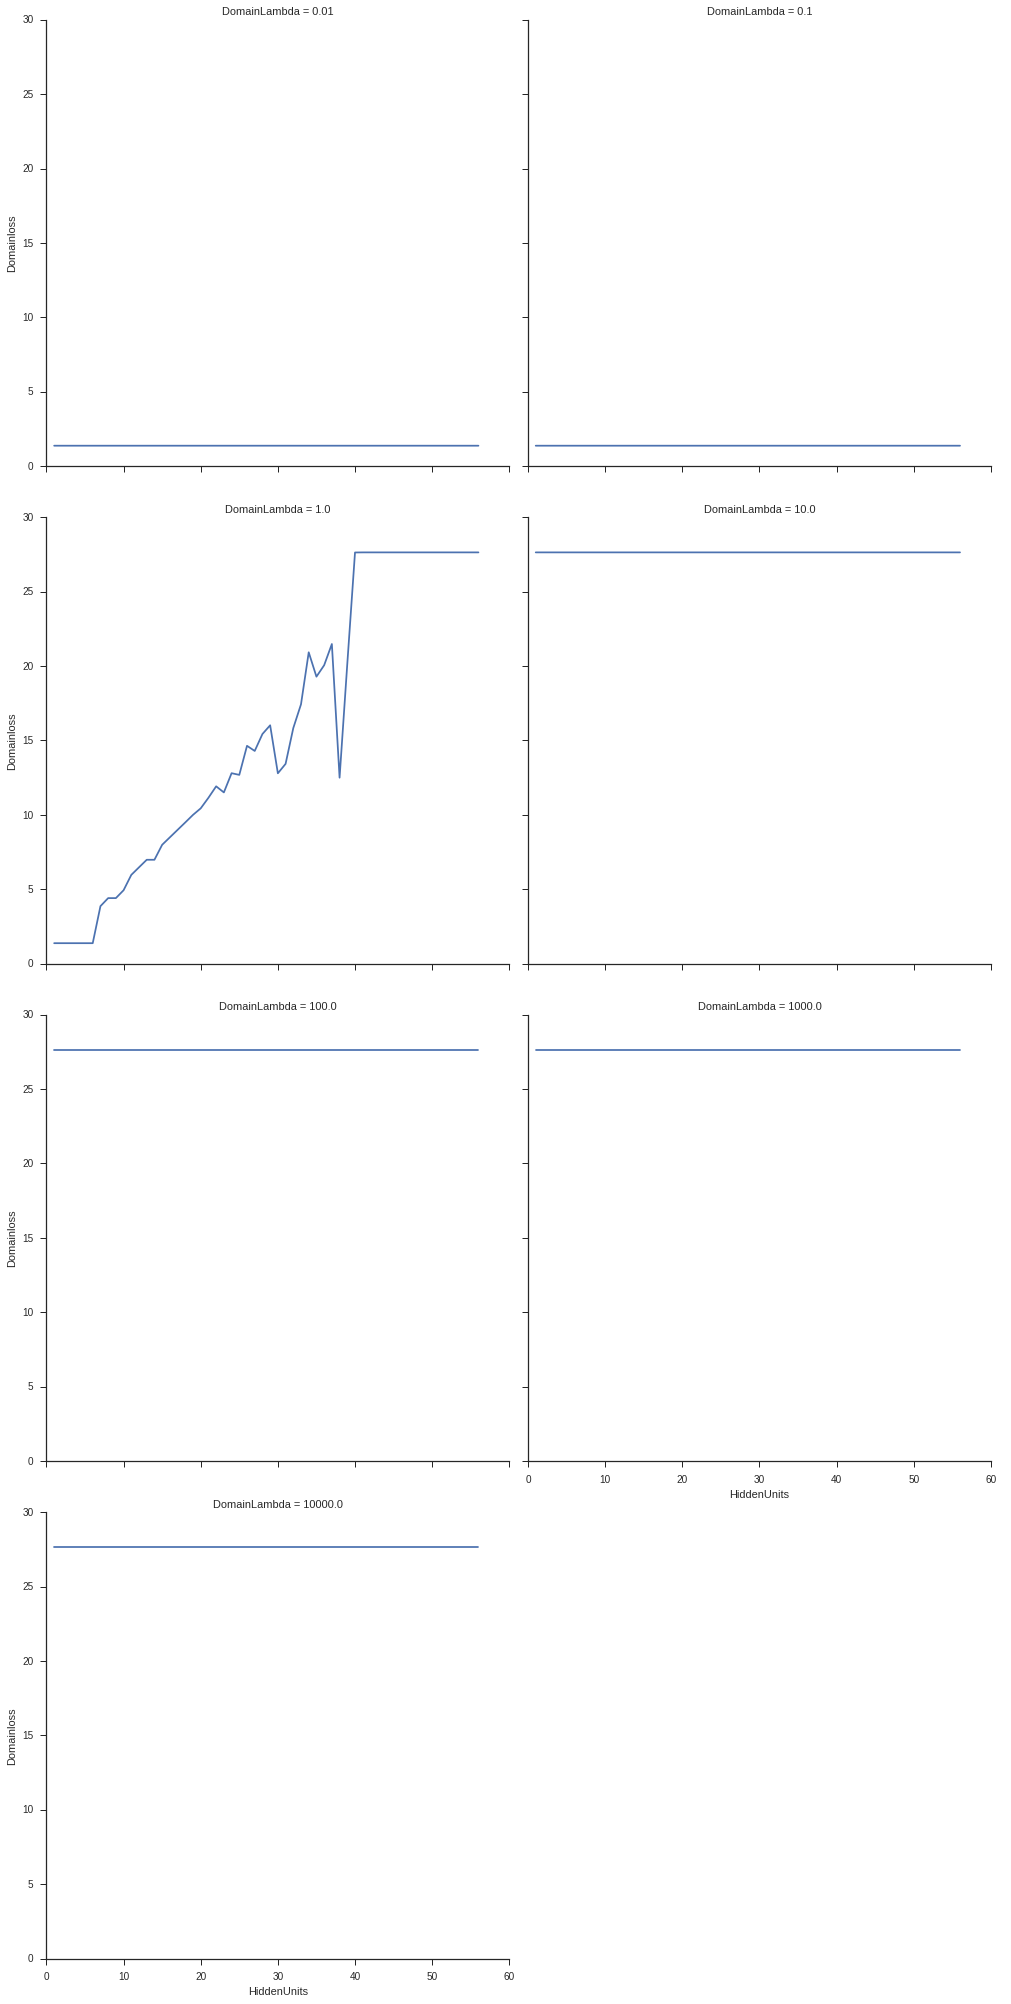

In [18]:
#g = sns.FacetGrid(exp2, hue="DomainLambda", size=13)
g = sns.FacetGrid(exp2, col_wrap = 2,col="DomainLambda", size=7)
g.map(plt.plot, "HiddenUnits", "Domainloss")
#g.map(plt.scatter, "HiddenUnits", "Domainloss", s=50, alpha=0.7, linewidth=.5, edgecolor="white")
g.add_legend();

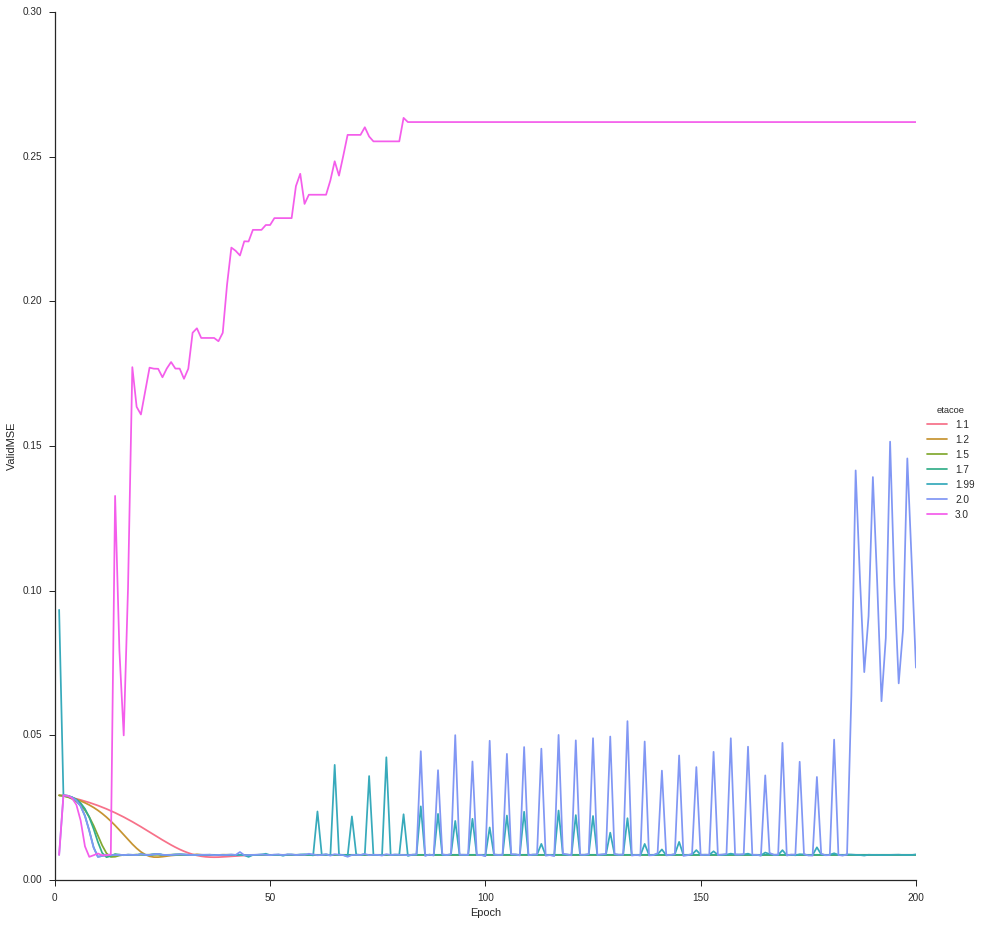

In [82]:
# To see if we choose the 1.2 different
filepath = 'exp3/data.csv'
lr = pd.read_csv(filepath)
g = sns.FacetGrid(lr, hue="etacoe", size=13)
g.map(plt.plot, "Epoch", "ValidMSE")
g.add_legend();

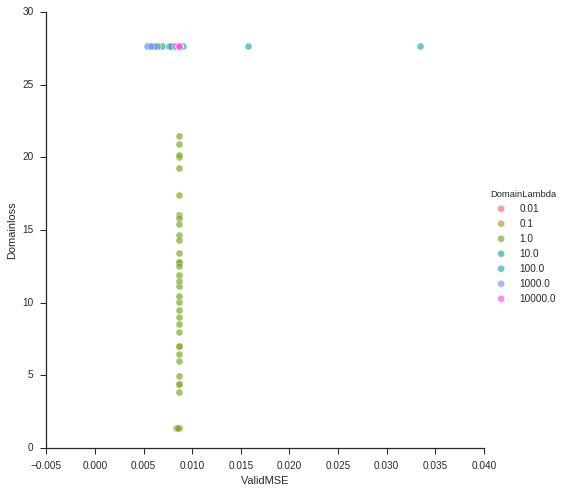

In [12]:
#pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(exp2, hue="DomainLambda", size=7)
g.map(plt.scatter, "ValidMSE", "Domainloss", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

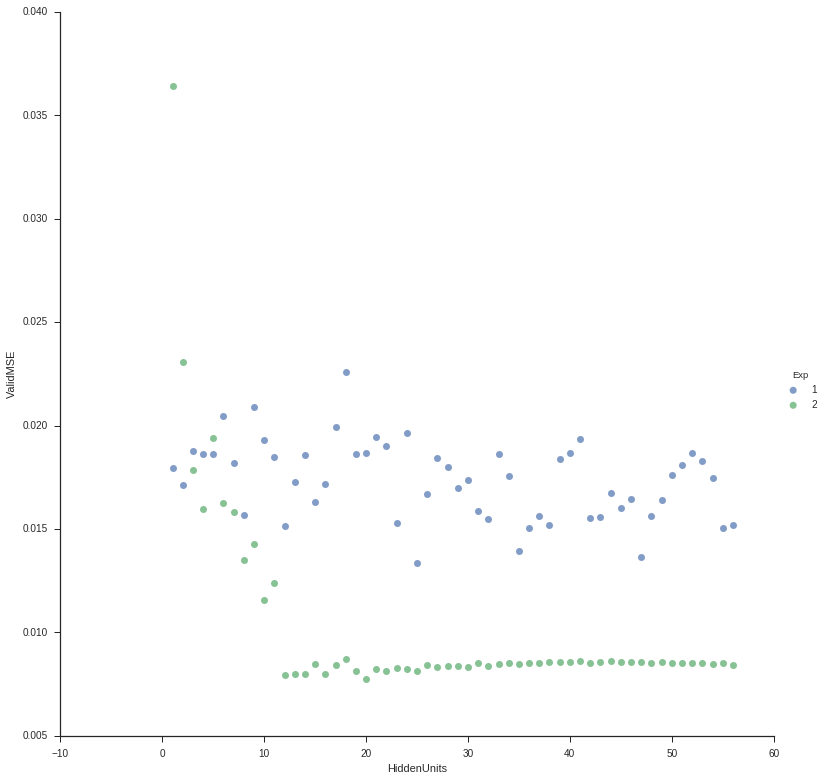

In [84]:
filepath = 'test.csv'
ml = pd.read_csv('test.csv')
g = sns.FacetGrid(ml, hue="Exp", size=11)
g.map(plt.scatter, "HiddenUnits", "ValidMSE", s=50, alpha=.7, linewidth=.1, edgecolor="white")
g.add_legend();